<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import os
import sys
sys.path.append('../')
from search_world.utils.moog_utils import get_trial_paths, get_trial_dataframe
import matplotlib.pyplot as plt
from matplotlib import cm

In [70]:
DATASETS = ['/Users/aidapiccato/search-world-1/logs/symm_corr/0/2021_11_10_17_06_56']

In [71]:
dataset_trial_paths = []
for i, path in enumerate(DATASETS):
    print(os.path.basename(path))
    trial_paths = get_trial_paths(path)
    dataset_trial_paths.append(trial_paths)

dataset_index = 0
for trial_paths in dataset_trial_paths[1:]:
    dataset_index += 1
    new_df = get_trial_dataframe.get_trial_dataframe(trial_paths, dataset_index=dataset_index)
    trial_df = trial_df.append(new_df, ignore_index=True)

2021_11_10_17_06_56
Number of trials:  3


In [107]:
dataset_index = 0
trial_df = get_trial_dataframe(dataset_trial_paths[0], dataset_index=dataset_index)

In [109]:
trial_df.obs

0    [2, 4, 5, 0]
1    [2, 4, 5, 0]
2    [2, 4, 5, 0]
Name: obs, dtype: object

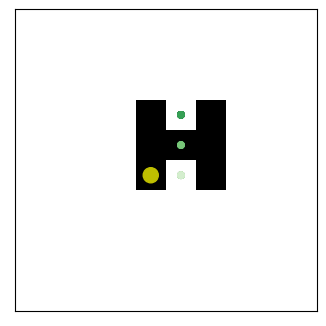

In [97]:
def plot_maze(orig_maze_array, prey_pos, agent_pos):
    f = plt.figure(dpi=100)
    plt.imshow(np.flip(np.stack(orig_maze_array), axis=0), cmap='binary_r')
    prey = plt.Circle(prey_pos, color='y', radius=0.25)
    agent_pos = agent_pos
    cmap = [cm.get_cmap('Greens_r', len(agent_pos))(i) for i in range(len(agent_pos))]
    plt.gca().add_patch(prey)    
    agent_pos = np.stack(agent_pos)
    plt.scatter(agent_pos[:, 0], agent_pos[:, 1], c=cmap,  s=20)
    plt.gca().set_yticks([])
    plt.gca().set_xticks([])

trial_idx = 2
plot_maze(np.flip(trial_df.iloc[trial_idx].maze_array, axis=0), trial_df.iloc[trial_idx].prey, trial_df.iloc[trial_idx].agent)